# Testing Parametric and Non-Parametric Distribution Tests

In [2]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

### Read Data in and Describe

In [3]:
ess = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [4]:
ess.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [5]:
ess.shape

(8594, 13)

In [6]:
ess.dtypes

cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

In [7]:
ess.head(5)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [8]:
ess.year.unique()

array([6, 7])

6 refers to 2012, while 7 refers to 2014

In [9]:
ess.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

### Clean the Data

In [10]:
#Determine missing values across dataframe

missing_values_count = ess.isnull().sum()
print(missing_values_count)

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64


In [11]:
#For the purpose of this exercise, drop all NaNs
ess = ess.dropna()

Tune some of our variables to be categorical

In [12]:
#Change years to a more categorical form
ess['year'] = np.where((ess['year'] == 6), 'Year-2012', 'Year-2014')

In [13]:
#Change year to categorical data type
ess['year'] = ess['year'].astype('category')

In [14]:
#Change gender to a more categorical form
ess['gndr'] = np.where((ess['gndr'] == 1.0), 'Male', 'Female')

In [15]:
#Change gender to categorical data type
ess['gndr'] = ess['gndr'].astype('category')

In [16]:
#Change years to a more categorical form
ess['partner'] = np.where((ess['partner'] == 1.0), 'Live Together', 'Do not Live Together')

In [17]:
ess['partner'] = ess['partner'].astype('category')

Drop superfluous column (idno)

In [18]:
#Drop IdNo
ess = ess.drop(['idno'], 1)

### Explore the Data

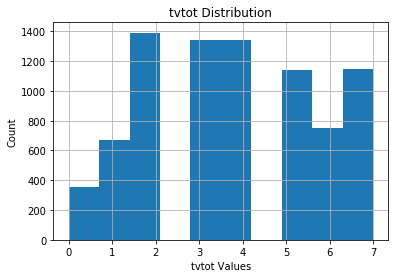

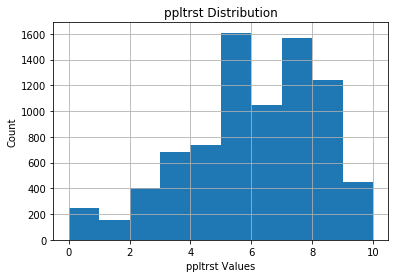

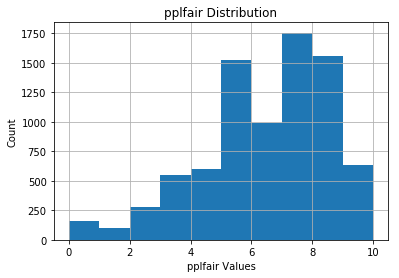

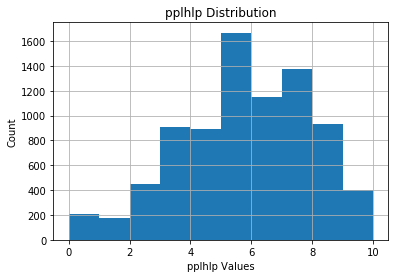

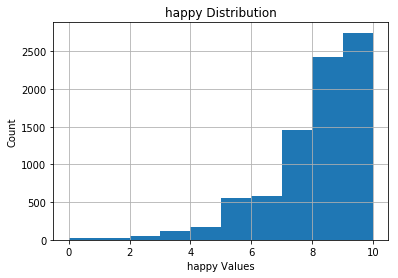

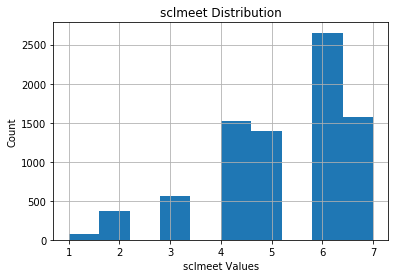

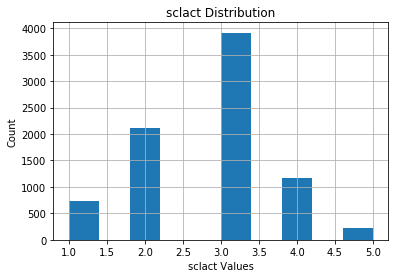

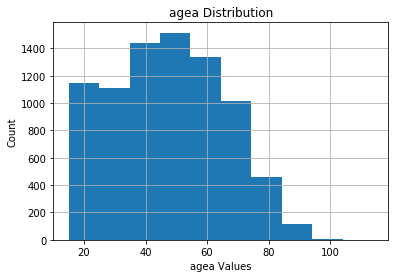

In [19]:
# Plot histograms for all continuous data
for col in ess.dtypes[ess.dtypes == 'float64'].index:
    ess[col].hist()
    plt.title(col + " Distribution")
    plt.xlabel(col + " Values")
    plt.ylabel("Count")
    plt.show()

### Analytical Question 1: Did people become less trusting? Compute results for each country in the sample.

In [20]:
#Create dataframes for each country
CH = ess.loc[ess['cntry'] == 'CH']
CZ = ess.loc[ess['cntry'] == 'CZ']
DE = ess.loc[ess['cntry'] == 'DE']
ES = ess.loc[ess['cntry'] == 'ES']
NO = ess.loc[ess['cntry'] == 'NO']
SE = ess.loc[ess['cntry'] == 'SE']

In [21]:
#Printing the means for each group.
cntry_dfs = [CH, CZ, DE, ES, NO, SE]
for df in cntry_dfs:
    print(round(df.ppltrst.mean(), 2))

5.73
4.38
5.22
5.03
6.62
6.14


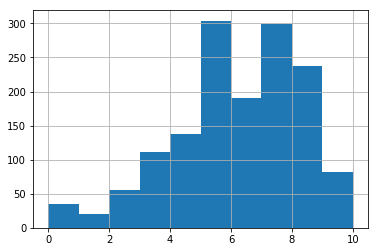

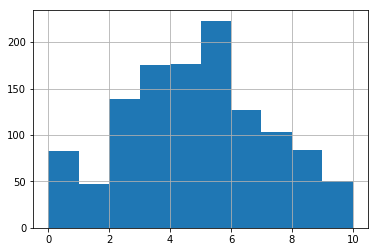

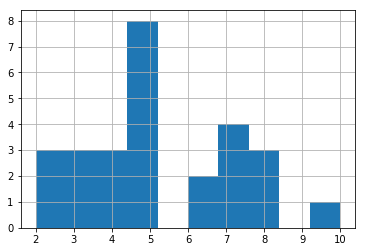

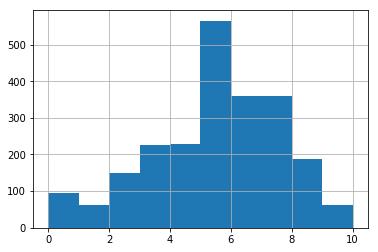

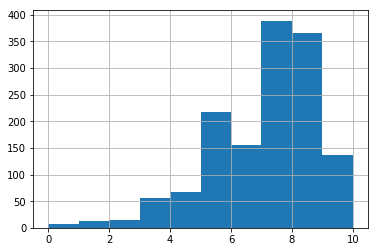

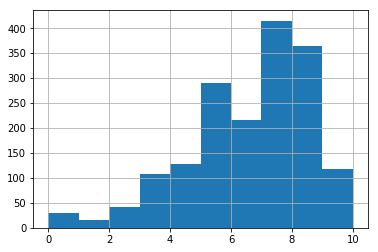

In [22]:
#Plot histogram of ppltrst for each country
for df in cntry_dfs:
    df.ppltrst.hist()
    plt.show()

In [30]:
F, p = stats.f_oneway(
    CH['ppltrst'],
    CZ['ppltrst'],
    DE['ppltrst'],
    ES['ppltrst'],
    NO['ppltrst'],
    SE['ppltrst'])

#F statistic.
print(F)

#A p < .05 would lead us to believe the group means were not all similar in the population.
print(p)

208.90176779877532
3.007054579992942e-210


In [24]:
print(stats.ttest_ind(CH['ppltrst'], CZ['ppltrst']))
print(stats.ttest_ind(CH['ppltrst'], DE['ppltrst']))
print(stats.ttest_ind(CH['ppltrst'], ES['ppltrst']))
print(stats.ttest_ind(CH['ppltrst'], NO['ppltrst']))
print(stats.ttest_ind(CH['ppltrst'], SE['ppltrst']))

print(stats.ttest_ind(CZ['ppltrst'], DE['ppltrst']))
print(stats.ttest_ind(CZ['ppltrst'], ES['ppltrst']))
print(stats.ttest_ind(CZ['ppltrst'], NO['ppltrst']))
print(stats.ttest_ind(CZ['ppltrst'], SE['ppltrst']))

print(stats.ttest_ind(DE['ppltrst'], ES['ppltrst']))
print(stats.ttest_ind(DE['ppltrst'], NO['ppltrst']))
print(stats.ttest_ind(DE['ppltrst'], SE['ppltrst']))

print(stats.ttest_ind(ES['ppltrst'], NO['ppltrst']))
print(stats.ttest_ind(ES['ppltrst'], SE['ppltrst']))

print(stats.ttest_ind(NO['ppltrst'], SE['ppltrst']))

Ttest_indResult(statistic=15.591363135057318, pvalue=1.577882893133148e-52)
Ttest_indResult(statistic=1.2281665245214957, pvalue=0.21957713515614072)
Ttest_indResult(statistic=9.713677236895192, pvalue=4.774257100119087e-22)
Ttest_indResult(statistic=-12.337782837087929, pvalue=4.026338929630907e-34)
Ttest_indResult(statistic=-5.697466908716274, pvalue=1.3262456423465526e-08)
Ttest_indResult(statistic=-1.8430857763525381, pvalue=0.06555658224957261)
Ttest_indResult(statistic=-8.309880420426058, pvalue=1.354273943195643e-16)
Ttest_indResult(statistic=-27.721113028176227, pvalue=1.4219730269573634e-148)
Ttest_indResult(statistic=-21.70732061674138, pvalue=5.16340155261975e-97)
Ttest_indResult(statistic=0.45198303829097924, pvalue=0.6513235093523141)
Ttest_indResult(statistic=-4.023969828877652, pvalue=6.018831950947124e-05)
Ttest_indResult(statistic=-2.347876040495308, pvalue=0.018991568086238746)
Ttest_indResult(statistic=-23.3658637414511, pvalue=9.11675844002967e-113)
Ttest_indResult(

**Chosen Approach:** Parametric - Used one-way ANOVA, followed by pairwise t tests because for the most part the data was somewhat normal and we had 3+ groups.

### Analytical Question 2: Did people become happier? Compute results for each country in the sample.

In [25]:
# Printing the means for each group.
cntry_dfs = [CH, CZ, DE, ES, NO, SE]
for df in cntry_dfs:
    print(round(df.happy.mean(), 2))

8.11
6.86
7.59
7.5
8.09
7.92


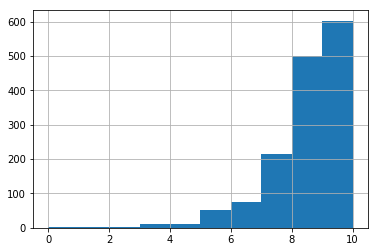

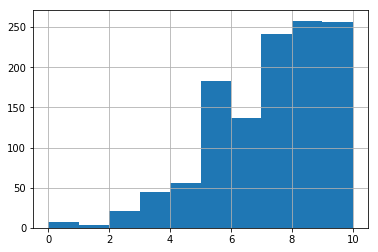

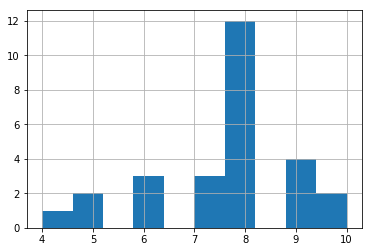

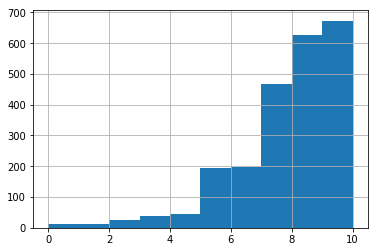

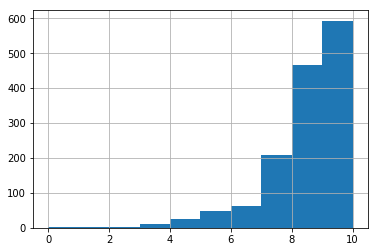

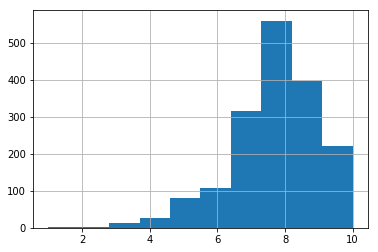

In [26]:
#Plot histogram of happy for each country
for df in cntry_dfs:
    df.happy.hist()
    plt.show()

In [27]:
#Kruskal-Wallace Test

#Join all ratings together into a list, then ranking them.
CH_rank = stats.rankdata(CH['happy'].tolist())
CZ_rank = stats.rankdata(CZ['happy'].tolist())
DE_rank = stats.rankdata(DE['happy'].tolist())
ES_rank = stats.rankdata(ES['happy'].tolist())
NO_rank = stats.rankdata(NO['happy'].tolist())
SE_rank = stats.rankdata(SE['happy'].tolist())

#Disable warning
pd.options.mode.chained_assignment = None

#Add ranks to dfs
CH['happy_rank'] = CH_rank
CZ['happy_rank'] = CZ_rank
DE['happy_rank'] = DE_rank
ES['happy_rank'] = ES_rank
NO['happy_rank'] = NO_rank
SE['happy_rank'] = SE_rank

#Print the test statistic followed by the probability of getting this result if the groups were not different.
stats.kruskal(     
    CH['happy'],
    CZ['happy'],
    DE['happy'],
    ES['happy'],
    NO['happy'],
    SE['happy'])

KruskalResult(statistic=450.71321732949133, pvalue=3.44687186022373e-95)

**Chosen Approach:** Non-Parametric - Used Kruskal-Wallace test due to non-normality of data

### Analytical Question 3: Who reported watching more TV in 2012, men or women?

In [32]:
#Create dataframes for gender
ess_male = ess.loc[ess['gndr'] == 'Male']
ess_female = ess.loc[ess['gndr'] == 'Female']

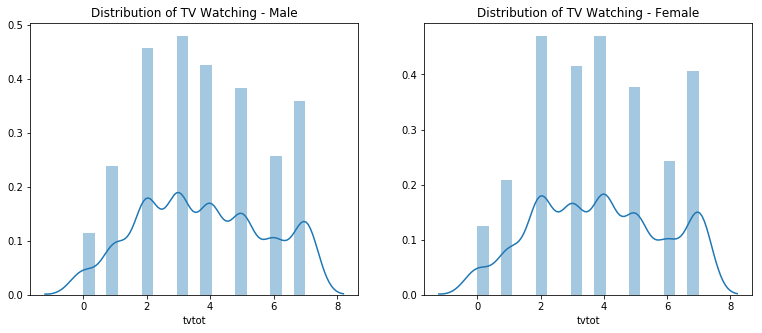

count    4103.000000
mean        3.782842
std         1.994478
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: tvtot, dtype: float64
count    4044.000000
mean        3.854847
std         2.023104
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: tvtot, dtype: float64


In [36]:
#Look at histograms for male/female tv watching
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(ess_male['tvtot'])
plt.title('Distribution of TV Watching - Male')

plt.subplot(1,3,2)
sns.distplot(ess_female['tvtot'])
plt.title('Distribution of TV Watching - Female')
plt.show()

print(ess_male.tvtot.describe())
print(ess_female.tvtot.describe())

In [37]:
print(stats.ttest_ind(ess_male['tvtot'], ess_female['tvtot']))

Ttest_indResult(statistic=-1.6176926106407103, pvalue=0.10576758143732026)


**Chosen Approach:** Parametric - Independent T Tests since we are dealing with only two groups.

### Analytical Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [48]:
#Create dataframes for parter/no partner (2012)
ess_partner = ess.loc[(ess['partner'] == 'Live Together') & (ess['year'] == 'Year-2012')]
ess_nopartner = ess.loc[(ess['partner'] == 'Do not Live Together') & (ess['year'] == 'Year-2012')]

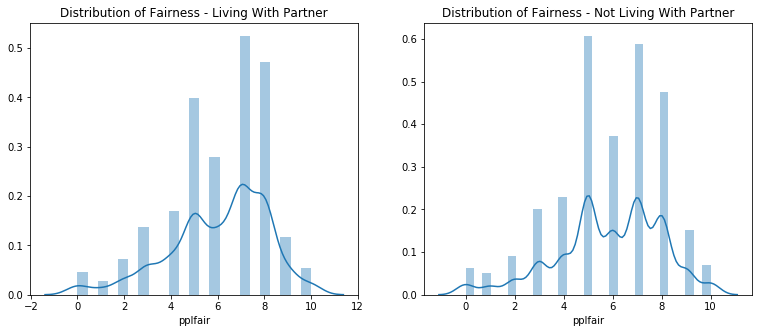

count    2542.000000
mean        6.074351
std         2.102916
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: pplfair, dtype: float64
count    1529.000000
mean        5.865925
std         2.138453
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: pplfair, dtype: float64


In [53]:
#Look at histograms for partner/no partner fairness
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(ess_partner['pplfair'])
plt.title('Distribution of Fairness - Living With Partner')

plt.subplot(1,3,2)
sns.distplot(ess_nopartner['pplfair'])
plt.title('Distribution of Fairness - Not Living With Partner')
plt.show()

print(ess_partner.pplfair.describe())
print(ess_.pplfair.describe())

In [54]:
print(stats.ttest_ind(ess_partner['pplfair'], ess_nopartner['pplfair']))

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


**Chosen Approach:** Parametric - Independent T Tests since we are dealing with only two groups.

### Analytical Question 5: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [55]:
#Filter dataframes for just 2014
CH = ess.loc[(ess['cntry'] == 'CH') & (ess['year'] == 'Year-2014')]
CZ = ess.loc[(ess['cntry'] == 'CZ') & (ess['year'] == 'Year-2014')]
DE = ess.loc[(ess['cntry'] == 'DE') & (ess['year'] == 'Year-2014')]

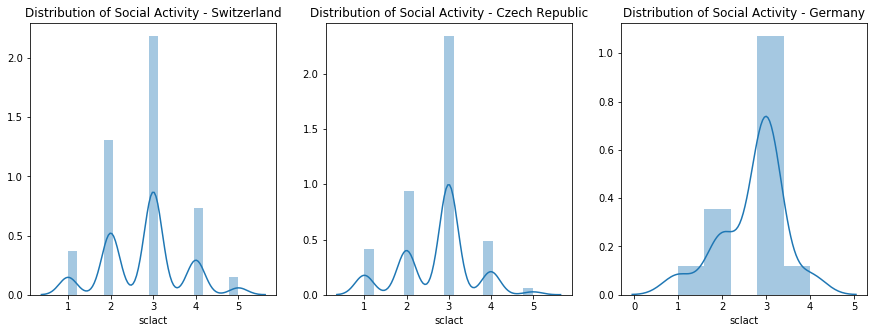

count    743.000000
mean       2.784657
std        0.906360
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64
count    606.000000
mean       2.729373
std        0.844640
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64
count    14.000000
mean      2.714286
std       0.726273
min       1.000000
25%       2.250000
50%       3.000000
75%       3.000000
max       4.000000
Name: sclact, dtype: float64


In [56]:
#Look at histograms for partner/no partner fairness
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
sns.distplot(CH['sclact'])
plt.title('Distribution of Social Activity - Switzerland')

plt.subplot(1,3,2)
sns.distplot(CZ['sclact'])
plt.title('Distribution of Social Activity - Czech Republic')

plt.subplot(1,3,3)
sns.distplot(DE['sclact'])
plt.title('Distribution of Social Activity - Germany')
plt.show()

print(CH.sclact.describe())
print(CZ.sclact.describe())
print(DE.sclact.describe())

In [57]:
F, p = stats.f_oneway(
    CH['sclact'],
    CZ['sclact'],
    DE['sclact'])

#F statistic.
print(F)

#A p < .05 would lead us to believe the group means were not all similar in the population.
print(p)

0.6805323062052006
0.5065197308755334


In [58]:
print(stats.ttest_ind(CH['sclact'], CZ['sclact']))
print(stats.ttest_ind(CH['sclact'], DE['sclact']))
print(stats.ttest_ind(CZ['sclact'], DE['sclact']))

Ttest_indResult(statistic=1.148808631379681, pvalue=0.25083885461561173)
Ttest_indResult(statistic=0.28869953984944624, pvalue=0.7728905598034453)
Ttest_indResult(statistic=0.06625763933618, pvalue=0.9471941363231762)


**Chosen Approach:** Parametric - Used one-way ANOVA, followed by pairwise t tests because for the most part the data was somewhat normal and we had 3+ groups. No countries really stood out in terms of differences here. The small sample size of Germany may have impacted the results.